# Проект: Анализ изменения цены лечения в медицинской клинике

Описание проекта: необходимо провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года.

Цель проекта: определить ключевые драйверы изменения цены лечения.

Ход исследования:
- Обзор и предобработка данных.
- Исследовательский анализ данных.
- Определение причин изменения цен на лечение.

### 1. Загрузка данных и подготовка к анализу.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в переменную
try:
    data = pd.read_excel('C:/Users/Ирина/Downloads/data_test_task_2022.xlsx')
except:
    data = pd.read_excel('/datasets/data_test_task_2022.xlsx')

In [3]:
# просмотр таблицы
data.head(15)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.0,26


In [4]:
# просмотр информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


Структура таблицы:
- record_id - уникальный идентификатор строки данных;
- service_date - дата оказания медицинской услуги;
- service_name - наименование медицинской услуги;
- service_amount - сумма выплат (стоимость оказанных услуг в рублях);
- service_number - количество услуг;
- insured - уникальный идентификатор пациента;
- sex_id - пол пациента;
- age_for_service_date - возраст пациента.

В некоторых столбцах необходимо привести значения к соответствующему типу.

In [5]:
# преобразование данных о времени в столбце "service_date"
data['service_date'] = pd.to_datetime(data['service_date'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
# преобразование данных в столбцах "record_id" и "insured"
for column in ['record_id', 'insured']:
    data[column] = data[column].astype(str)

Проверим данные на наличие пропусков.

In [7]:
data.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

Есть пропуски в одном столбце "sex_id" в количестве 21ой строки. Поскольку количество строк с пропусками относительно всего датафрейма не значительное, то удалим эти строки.

In [8]:
data = data.dropna(subset=['sex_id'])

Проверим датафрейм на наличие явных дубликатов.

In [9]:
print('\nЧисло дубликатов:', data.duplicated().sum())


Число дубликатов: 0


Проверим столбцы с количественными значениями на наличие аномальных значений (столбцы "service_amount", "service_number", "age_for_service_date").

In [10]:
data['service_amount'].describe()

count    85348.000000
mean      1166.124783
std        799.064738
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

В столбце "service_amount" аномальных значений не выявлено.

In [11]:
data['service_number'].describe()

count    85348.000000
mean         1.022871
std          0.229043
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: service_number, dtype: float64

В столбце "service_number" аномальных значений не выявлено.

In [12]:
data['age_for_service_date'].describe()

count    85348.000000
mean        33.852873
std         12.145506
min          0.000000
25%         27.000000
50%         34.000000
75%         41.000000
max         83.000000
Name: age_for_service_date, dtype: float64

В столбце "age_for_service_date" аномальных значений не выявлено.

Проверим значения в столбце "sex_id", должно быть два значения.

In [13]:
data['sex_id'].unique()

array([2., 1.])

В столбце "sex_id" корректные значения. Судя по специфике услуг в датафрейме можно сделать вывод, что значение, равное 1, соответствует мужчине, а значение 2 - женщине.

Проверим столбец "service_name" на наличие неявных дубликатов.

In [14]:
# посчитаем количество уникальных значений 
len(data['service_name'].unique())

875

In [15]:
# выводим уникальные значения 
data['service_name'].sort_values().unique()

array(['(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )',
       '(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )',
       '(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)',
       '(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)',
       '(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)',
       '17-OH - гидроксипрогестерон',
       '25-OH витамин D (25-гидроксихолекальциферол)', 'Ascaris IgG',
       'Bordetella (pertusis) IgA', 'Bordetella (pertusis) IgG',
       'Bordetella (pertusis) IgM', 'Bordetella pertussis (Слюна)',
       'Bordetella pertussis (Соскоб)', 'CMV (цитомегаловирус) (Кровь)',
       'CMV (цитомегаловирус)

In [16]:
# приводим все значения к нижнему регистру
data['service_name'] = data['service_name'].str.lower()

In [17]:
# убираем лишние пробелы и запятые
data['service_name'] = data['service_name'].astype(str).str.replace(' )', ')', regex=False)
data['service_name'] = data['service_name'].astype(str).str.replace('( ', '(', regex=False)
data['service_name'] = data['service_name'].astype(str).str.replace(' ,', ',')
data['service_name'] = data['service_name'].astype(str).str.replace(', ', ',')
data['service_name'] = data['service_name'].astype(str).str.replace(' -', '-')
data['service_name'] = data['service_name'].astype(str).str.replace('- ', '-')
data['service_name'] = data['service_name'].astype(str).str.replace(',,', ',')

In [18]:
data['service_name'].sort_values().unique()

array(['(1 e)аллергопанель ige (молоко коровье,молоко козье,молоко овечье,сыр,творог,сметана,йогурт,кефир)',
       '(2 e)аллергопанель ige (пшеничная мука,ржаная мука,рис,гречка,овес,перловка,пшено,ячменнная крупа)',
       '(3 e)аллергопанель ige (фасоль (бобы),горох,чечевица (смесь),кукуруза,дрожжи пекарские,белок куриного яйца,желток куриного яйца,яйцо перепелиное)',
       '(4 e)аллергопанель ige (говядина,телятина,свинина,баранина,курица,индейка,утка,гусь)',
       '(б1 (11))аллергопанель ige шерсть кошки,шерсть собаки,шерсть овцы,клещ d,pteroniss,клещ d.farina,пыль домашняя,перо подушки,библиотечная пыль)',
       '17-oh-гидроксипрогестерон',
       '25-oh витамин d (25-гидроксихолекальциферол)', 'ascaris igg',
       'bordetella (pertusis) iga', 'bordetella (pertusis) igg',
       'bordetella (pertusis) igm', 'bordetella pertussis (слюна)',
       'bordetella pertussis (соскоб)', 'candida albicans (соскоб)',
       'chlamydia pneumoniae iga', 'chlamydia pneumoniae igg',
       

Еще раз проверим столбец "service_name" на наличие неявных дубликатов.

In [19]:
len(data['service_name'].unique())

875

Количество уникальных значений не изменилось.

### 2. Исследовательский анализ данных.

Проверим за какой период представлены данные (самую раннюю и самую позднюю даты).

In [20]:
min(data['service_date'])

Timestamp('2021-01-03 00:00:00')

In [21]:
max(data['service_date'])

Timestamp('2022-08-31 00:00:00')

Данные представлены с 3 января 2021 года по 31 августа 2022 года.

Для дальнейшего анализа добавим столбцы с указанием года и месяца оказания услуги, а также с указанием стоимости одной услуги.

In [22]:
# добавляем столбецы с годом и месяцем
data['service_date_year'] = data['service_date'].dt.year
data['service_date_month'] = data['service_date'].dt.month
data['month_year'] = data['service_date'].dt.to_period('M')

# добавляем столбец с указанием стоимости одной услуги
data['price_one_service'] = data['service_amount'] / data['service_number']

# проверяем таблицу
data.sample(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_date_year,service_date_month,month_year,price_one_service
36770,31680643403,2021-11-09,"прием хирурга,первичный",1540,1,660867,2.0,39,2021,11,2021-11,1540.0
6081,30489466203,2021-03-21,интерпретация экг с описанием,525,1,490700,1.0,29,2021,3,2021-03,525.0
61506,32510908103,2022-04-01,"прием трапевта,первичный",1540,1,935516,1.0,36,2022,4,2022-04,1540.0
16460,30961580403,2021-06-13,прием повторный,1313,1,402368,2.0,45,2021,6,2021-06,1313.0
67371,32631389003,2022-05-19,"прием невролога,повторный",1380,1,1072419,2.0,24,2022,5,2022-05,1380.0
85323,33178142603,2022-08-15,магнитотерапия (1 сеанс),1120,1,1217256,1.0,59,2022,8,2022-08,1120.0
64779,32511239203,2022-04-02,"прием травматолога-ортопеда,повторный",1380,1,873340,1.0,28,2022,4,2022-04,1380.0
67949,32631447703,2022-05-28,"прием кардиолога,повторный",1380,1,831955,2.0,57,2022,5,2022-05,1380.0
6766,30489534703,2021-03-28,прием первичный,1470,1,512458,2.0,26,2021,3,2021-03,1470.0
47417,31996542203,2022-01-31,взятие крови из периферической вены,170,1,512558,1.0,61,2022,1,2022-01,170.0


Посчитаем сумму прибыли за 2021 и 2022 года.

In [23]:
# создаем сводную таблицу
amount_sum_year = data.pivot_table(index='service_date_year', values='service_amount', aggfunc='sum')
amount_sum_year

,service_amount
service_date_year,
2021,50539756
2022,48986662


Прибыль за 2021 год выше (50 539 756 рублей). В 2022 году прибыль составила 48 986 662 рублей. Но в датафрейме включены не все месяцы за 2022 год. Посмотрим прибыль клиники помесячно. 

In [24]:
# отфильтруем данные за 2021 год
data_2021 = data.loc[data['service_date_year'] == 2021]
# создаем сводную таблицу
data_2021_month_sum = data_2021.pivot_table(index='service_date_month', values='service_amount', aggfunc='sum')
data_2021_month_sum.columns = ['sum']
data_2021_month_sum.reset_index()

,service_date_month,sum
0,1,2265931
1,2,2379125
2,3,3914994
3,4,4377704
4,5,4297508
5,6,4517177
6,7,3872209
7,8,4310989
8,9,4782859
9,10,6063580


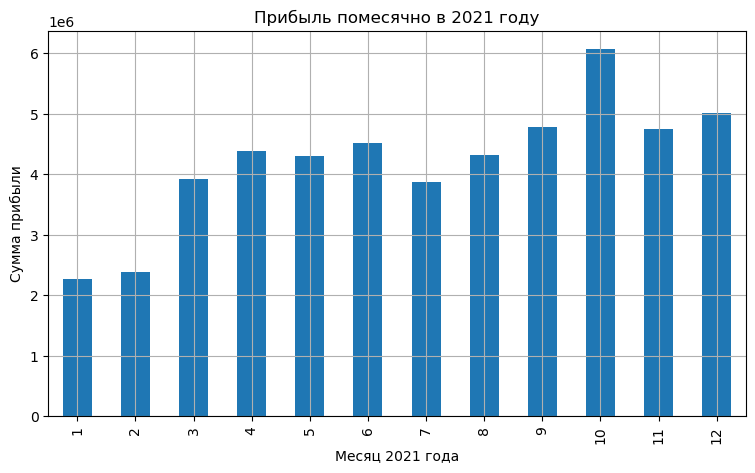

In [25]:
# создаем график 
(data_2021_month_sum
    .plot(kind='bar', grid=True, figsize=(9, 5), y='sum', 
          title='Прибыль помесячно в 2021 году', 
          legend = False))

plt.xlabel('Месяц 2021 года')
plt.ylabel('Сумма прибыли')
plt.show()

Ежемесячная прибыль в 2021 году имеет тенденцию роста, при этом самая высокая прибыль была в октябре.

Посчитаем среднюю прибыль за месяц в 2021 году.

In [26]:
round(data_2021_month_sum['sum'].mean(), 2)

4211646.33

Среднемесячная прибыль в 2021 году составила 4 211 646 рублей.

Изучим прибыль за 2022 год.

In [27]:
# отфильтруем данные за 2022 год
data_2022 = data.loc[data['service_date_year'] == 2022]
# создаем сводную таблицу
data_2022_month_sum = data_2022.pivot_table(index='service_date_month', values='service_amount', aggfunc='sum')
data_2022_month_sum.columns = ['sum']
data_2022_month_sum.reset_index()

,service_date_month,sum
0,1,4800320
1,2,5298235
2,3,6451060
3,4,8035080
4,5,7588110
5,6,6879580
6,7,6216498
7,8,3717779


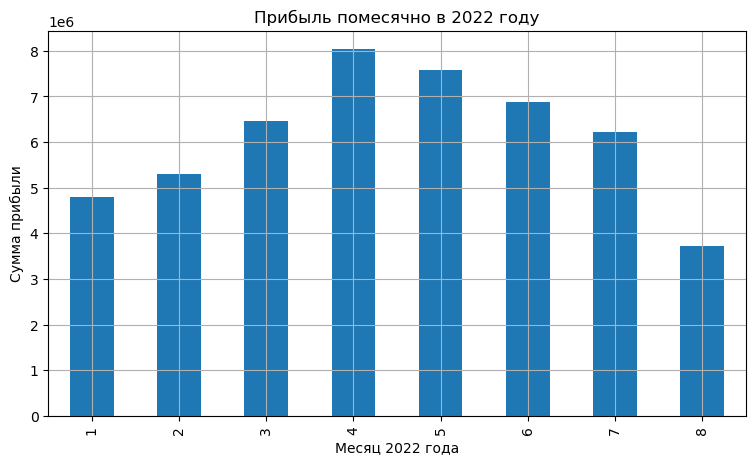

In [28]:
# создаем график 
(data_2022_month_sum
    .plot(kind='bar', grid=True, figsize=(9, 5), y='sum', 
          title='Прибыль помесячно в 2022 году', 
          legend = False))

plt.xlabel('Месяц 2022 года')
plt.ylabel('Сумма прибыли')
plt.show()

Самая высокая прибыль была в апреле 2022 году и составила 7 588 110 рублей. Прибыль росла до апреля 2022 года и затем стала снижаться.

Посчитаем среднюю прибыль за месяц в 2022 году.

In [29]:
round(data_2022_month_sum['sum'].mean(), 2)

6123332.75

Среднемесячная прибыль в 2022 году составила 6 123 332 рублей. Таким образом среднемесячная прибыль в 2022 году выше, чем в 2021 году.

Создадим тепловую карту для более наглядного сравнения прибыли по месяцам за 2021 и 2022 года.

service_date_year,2021,2022
Jan,2265931,4800320
Feb,2379125,5298235
Mar,3914994,6451060
Apr,4377704,8035080
May,4297508,7588110
Jun,4517177,6879580
Jul,3872209,6216498
Aug,4310989,3717779
Sep,4782859,0
Oct,6063580,0


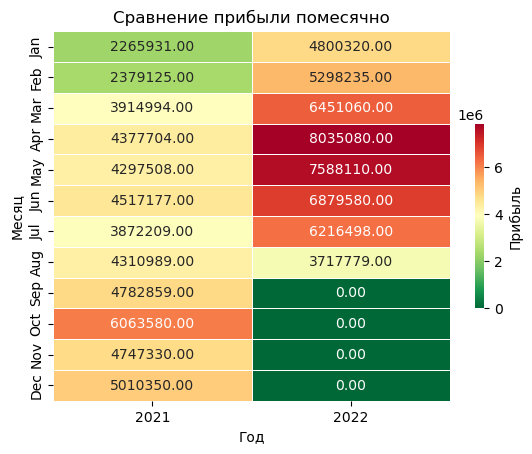

In [30]:
# создаем сводную таблицу с прибылью по месяцам за 2021 и 2022 года
amount_2021_2022 = pd.pivot_table(data, values='service_amount',
                                        index='service_date_month',
                                        columns='service_date_year',
                                        aggfunc='sum',
                                        fill_value=0)
                         
# создаем список из названия месяцев
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec']]
 
# переименуем месяцы на значения из mon_name
amount_2021_2022 = amount_2021_2022.set_index(mon_name)

 
# создаем тепловую карту
ax = sns.heatmap(amount_2021_2022, cmap='RdYlGn_r', 
                 robust=True, fmt='.2f', 
                 annot=True, linewidths=.6,
                 annot_kws={'size':10}, 
                 cbar_kws={'shrink':.5,
                           'label':'Прибыль'})                       
 
# устанавливаем надписи
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Сравнение прибыли помесячно')
plt.xlabel('Год')
plt.ylabel('Месяц')

amount_2021_2022

Если сравнивать прибыль за определенный месяц в разные года, можно сделать вывод, что 2022 год показал себя лучше, даже не смотря на тенденцию к снижению прибыли с мая 2022 года. Однако стоит обратить внимание, что в августе 2022 года было резкое снижение прибыли относительно этого года, и относительно этого же месяца предыдущего года.

Посчитаем количество визитов помесячно за 2021 и 2022 года. За визит будем принимать совокупность оказанных услуг одному застрахованному лицу за один день.

In [31]:
# посчитаем количество уникальных застрахованных за каждый день в 2021 году
visits_2021 = data_2021.pivot_table(index='service_date', values='insured', aggfunc='nunique').reset_index()
visits_2021['service_date_month'] = visits_2021['service_date'].dt.month

# сгруппируем таблицу visits_2021 по месяцам
count_visits_2021 = visits_2021.groupby('service_date_month')['insured'].agg('sum')
count_visits_2021.reset_index()

,service_date_month,insured
0,1,743
1,2,803
2,3,1177
3,4,1421
4,5,1328
5,6,1339
6,7,1226
7,8,1362
8,9,1602
9,10,1823


In [32]:
# посчитаем количество уникальных застрахованных за каждый день в 2022 году
visits_2022 = data_2022.pivot_table(index='service_date', values='insured', aggfunc='nunique').reset_index()
visits_2022['service_date_month'] = visits_2022['service_date'].dt.month

# сгруппируем таблицу visits_2022 по месяцам
count_visits_2022 = visits_2022.groupby('service_date_month')['insured'].agg('sum')
count_visits_2022.reset_index()

,service_date_month,insured
0,1,1413
1,2,1551
2,3,1920
3,4,2286
4,5,2311
5,6,2155
6,7,1753
7,8,1045


Объединим две таблицы.

In [33]:
dynamics_of_visits = pd.merge(count_visits_2021, count_visits_2022, on = 'service_date_month', how = 'left')
dynamics_of_visits.columns = ['2021', '2022']
dynamics_of_visits

,2021,2022
service_date_month,,
1,743,1413.0
2,803,1551.0
3,1177,1920.0
4,1421,2286.0
5,1328,2311.0
6,1339,2155.0
7,1226,1753.0
8,1362,1045.0
9,1602,NaN


Построим график, отображающий динамику количества визитов в медицинскую клинику в 2021 и 2022 годах.

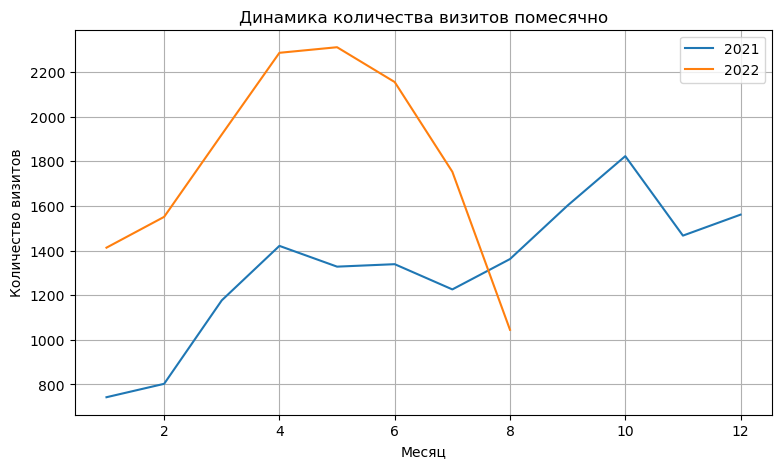

In [34]:
(dynamics_of_visits
    .plot(grid=True, figsize=(9, 5), y=['2021', '2022'], 
     title='Динамика количества визитов помесячно'))

plt.xlabel('Месяц')
plt.ylabel('Количество визитов')
plt.show()

Динамика количества визитов имеет возрастающую тенденцию до мая 2022 года. Далее количество визитов имеет резкое снижение.

Посчитаем среднюю стоимость одного визита в 2021 и 2022 годах помесячно.

In [35]:
# объединим таблицы ежемесячной прибыли и количества визитов за 2021 год 
mean_cost_of_visit_2021 = pd.merge(count_visits_2021, data_2021_month_sum, on = 'service_date_month')

# считаем среднюю стоимость визита за каждый месяц 2021 года
mean_cost_of_visit_2021['cost'] = round(mean_cost_of_visit_2021['sum'] / mean_cost_of_visit_2021['insured'], 2)
mean_cost_of_visit_2021.drop(['insured', 'sum'], axis= 1 , inplace= True)
mean_cost_of_visit_2021

,cost
service_date_month,
1,3049.71
2,2962.80
3,3326.25
4,3080.72
5,3236.08
6,3373.55
7,3158.41
8,3165.19
9,2985.55


In [36]:
# объединим таблицы ежемесячной прибыли и количества визитов за 2022 год 
mean_cost_of_visit_2022 = pd.merge(count_visits_2022, data_2022_month_sum, on = 'service_date_month')

# считаем среднюю стоимость визита за каждый месяц 2022 года
mean_cost_of_visit_2022['cost'] = round(mean_cost_of_visit_2022['sum'] / mean_cost_of_visit_2022['insured'], 2)
mean_cost_of_visit_2022.drop(['insured', 'sum'], axis= 1 , inplace= True)
mean_cost_of_visit_2022

,cost
service_date_month,
1,3397.25
2,3416.01
3,3359.93
4,3514.91
5,3283.47
6,3192.38
7,3546.21
8,3557.68


Объединим две таблицы. 

In [37]:
dynamics_of_costs = pd.merge(mean_cost_of_visit_2021, mean_cost_of_visit_2022, on = 'service_date_month', how = 'left')
dynamics_of_costs.columns = ['2021', '2022']
dynamics_of_costs

,2021,2022
service_date_month,,
1,3049.71,3397.25
2,2962.80,3416.01
3,3326.25,3359.93
4,3080.72,3514.91
5,3236.08,3283.47
6,3373.55,3192.38
7,3158.41,3546.21
8,3165.19,3557.68
9,2985.55,NaN


Построим график, отображающий динамику средней стоимости визита в медицинскую клинику в 2021 и 2022 годах.

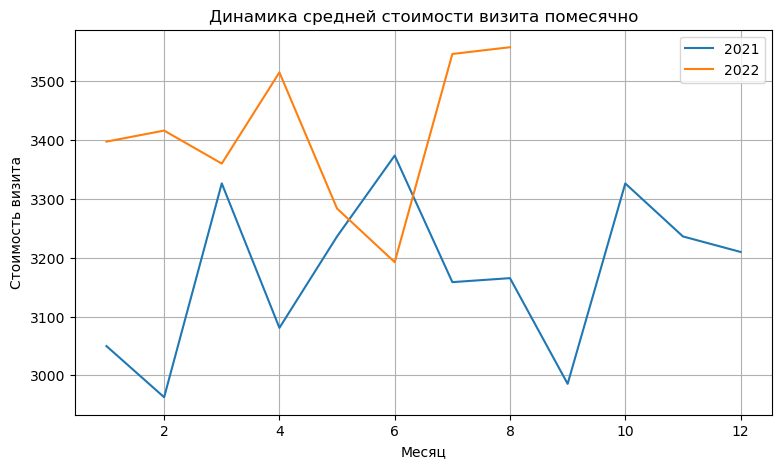

In [38]:
(dynamics_of_costs
    .plot(grid=True, figsize=(9, 5), y=['2021', '2022'], 
     title='Динамика средней стоимости визита помесячно'))

plt.xlabel('Месяц')
plt.ylabel('Стоимость визита')
plt.show()

В целом средняя стоимость визита выше в 2022 году. Данная стоимость ниже в июне 2022 года относительно 2021 года.

Итак, на основании проведенного анализа можно сделать следующие выводы:
- прибыль 2022 года выше относительно 2021 года,
- количество визитов росло до мая 2022 года, затем стало резко падать,
- средняя стоимость визита в 2022 году, выше, чем в 2021 году.

Исходя из этих выводов, в дальнейшем исследовании проверим гипотезы:
- средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги,
- средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс,
- средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот).

### Определение причин изменения цен на лечение.

Проверим изменилась ли средняя стоимость обслуживания из-за изменения цен на услуги.

Определим наиболее часто оказываемые услуги за весь наблюдаемый период.

In [39]:
# создаем сводную таблицу по количеству оказанных услуг и выберем 20 наиболее частых услуг
count_of_services = data.pivot_table(index='service_name', values='service_number', aggfunc='sum').reset_index()
count_of_services_top_20 = count_of_services.sort_values(by='service_number', ascending=False).head(20).reset_index(drop=True)
count_of_services_top_20

,service_name,service_number
0,прием первичный,6053
1,прием повторный,4474
2,взятие крови из периферической вены,4231
3,"общий анализ крови (лейкоцитарная форм,соэ)",3189
4,магнитотерапия (1 сеанс),2838
5,взятие мазка,2273
6,общий анализ мочи,1549
7,лазеротерапия (1 сеанс),1313
8,интерференционные токи (1 сеанс) (4 поля),1195
9,гинекологический мазок,1195


Создадим сводную таблицу, отображающую разницу в стоимости 20 наиболее популярных услуг в 2021 и 2022 годах.

In [40]:
# определим минимальную цену за услуги в 2021 году
min_cost_service_2021 = data_2021.pivot_table(index='service_name', values='price_one_service', aggfunc='min').reset_index()                                                
min_cost_service_2021

# определим максимальную цену за услуги в 2022 году
max_cost_service_2022 = data_2022.pivot_table(index='service_name', values='price_one_service', aggfunc='max').reset_index()  
max_cost_service_2022

# соединим две эти таблицы с таблицей с указанием 20 наиболее частых услуг
dinamics_of_cost_chaiging = pd.merge(count_of_services_top_20, min_cost_service_2021, on = 'service_name')
dinamics_of_cost_chaiging = pd.merge(dinamics_of_cost_chaiging, max_cost_service_2022, on = 'service_name')
dinamics_of_cost_chaiging.columns = ['service_name', 'service_number', 'price_one_service_2021', 'price_one_service_2022']

# определим разницу между минимальной и максимальной ценой
dinamics_of_cost_chaiging['delta'] = dinamics_of_cost_chaiging['price_one_service_2022'] - dinamics_of_cost_chaiging['price_one_service_2021']

# посчитаем разницу между минимальной и максимальной ценой в процентах
dinamics_of_cost_chaiging['delta_percent'] = round(dinamics_of_cost_chaiging['delta'] * 100 / dinamics_of_cost_chaiging['price_one_service_2021'], 2)
dinamics_of_cost_chaiging

,service_name,service_number,price_one_service_2021,price_one_service_2022,delta,delta_percent
0,взятие крови из периферической вены,4231,158.0,187.0,29.0,18.35
1,"общий анализ крови (лейкоцитарная форм,соэ)",3189,693.0,1800.0,1107.0,159.74
2,магнитотерапия (1 сеанс),2838,1040.0,1120.0,80.0,7.69
3,взятие мазка,2273,284.0,396.0,112.0,39.44
4,общий анализ мочи,1549,431.0,495.0,64.0,14.85
5,лазеротерапия (1 сеанс),1313,914.0,990.0,76.0,8.32
6,интерференционные токи (1 сеанс) (4 поля),1195,1040.0,1120.0,80.0,7.69
7,гинекологический мазок,1195,525.0,600.0,75.0,14.29
8,"прием трапевта,первичный",1157,1540.0,2950.0,1410.0,91.56
9,"прием гинеколога,повторный",1139,1380.0,1450.0,70.0,5.07


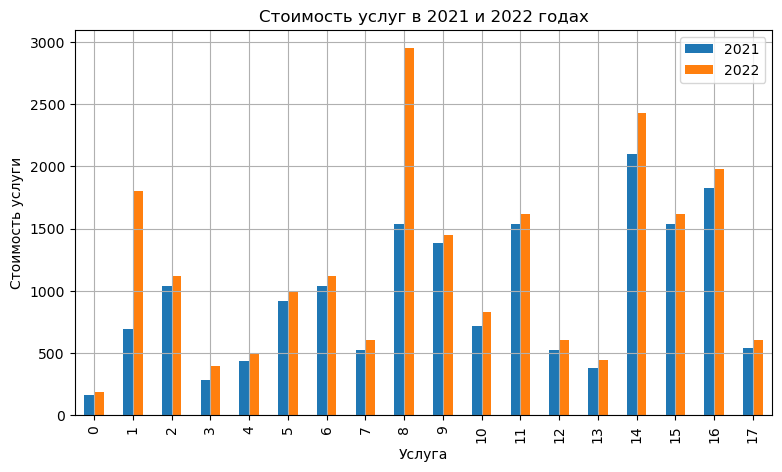

In [41]:
# создадим график стоимости услуг в 2021 и 2022 годах
dinamics_of_cost_chaiging.plot(kind='bar', grid=True, figsize=(9, 5), y=['price_one_service_2021', 'price_one_service_2022'], 
                               title='Стоимость услуг в 2021 и 2022 годах',
                               legend = False)

plt.xlabel('Услуга')
plt.ylabel('Стоимость услуги')
plt.legend(['2021', '2022'])
plt.show()

На все из наиболее частых услуг повысилась цена. При этом на такие услуги как "общий анализ крови (лейкоцитарная форм,соэ)" и "прием терапевта,первичный" цена возросла на 159 и 91 % соответственно. 

Посмотрим, когда произошло повышение цен.

In [42]:
# отфильтруем исходный датафрейм, оставим только те строки, в которых указана услуга, входящая в dinamics_of_cost_chaiging 
result = dinamics_of_cost_chaiging['service_name'].apply(str)
often_service_data = data.query('service_name in @result')
often_service_data

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_date_year,service_date_month,month_year,price_one_service
3,30268157303,2021-01-24,"общий анализ крови (лейкоцитарная форм,соэ)",693,1,490777,2.0,26,2021,1,2021-01,693.0
6,30268157603,2021-01-24,взятие крови из периферической вены,158,1,490777,2.0,26,2021,1,2021-01,158.0
8,30268157803,2021-01-26,магнитотерапия (1 сеанс),1040,1,490777,2.0,26,2021,1,2021-01,1040.0
13,30268158303,2021-01-27,взятие мазка,341,1,232418,2.0,25,2021,1,2021-01,341.0
16,30268158603,2021-01-27,гинекологический мазок,525,1,232418,2.0,25,2021,1,2021-01,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85355,33178145803,2022-08-04,взятие крови из периферической вены,187,1,1213119,1.0,44,2022,8,2022-08,187.0
85357,33178146003,2022-08-08,общий анализ мочи,495,1,1213119,1.0,44,2022,8,2022-08,495.0
85363,33178146703,2022-08-06,взятие крови из периферической вены,187,1,935341,2.0,30,2022,8,2022-08,187.0
85364,33178146803,2022-08-20,общий анализ мочи,495,1,935341,2.0,30,2022,8,2022-08,495.0


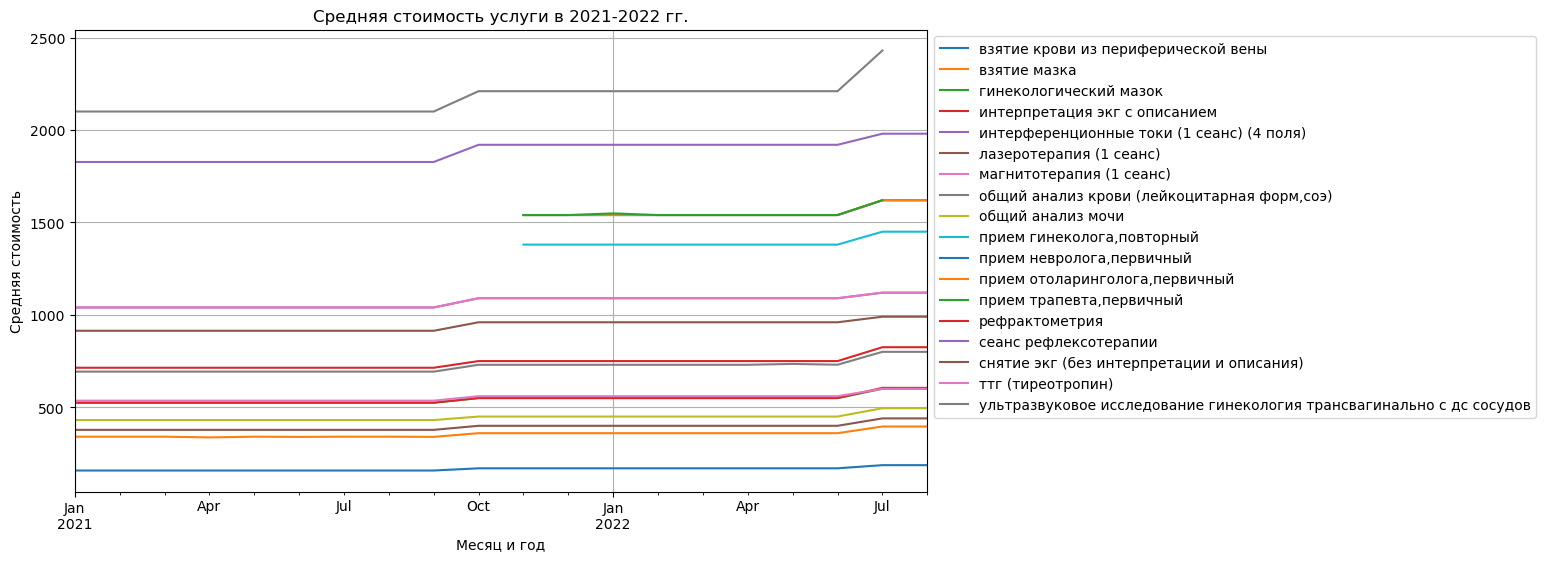

In [43]:
# построим график изменения стоимости услуг
(often_service_data.pivot_table(index='month_year', 
                                values='price_one_service', 
                                columns ='service_name',
                                aggfunc='mean')
.plot(grid=True, figsize=(11, 6), title='Средняя стоимость услуги в 2021-2022 гг.', 
      kind='line'))
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('Месяц и год')
plt.ylabel('Средняя стоимость')
plt.show()

Стоимость на услуги возросла в октябре 2021 года и в июле 2022 года.

Проверим изменилась ли средняя стоимость обслуживания из-за изменения среднего количества оказанных услуг на один кейс.

In [44]:
# создаем сводную таблицу по количеству застрахованных и количеству услуг за день
service_quantity = (data.groupby('service_date').agg({'insured':'nunique', 'service_number':'sum'})).reset_index()
service_quantity['month_year'] = service_quantity['service_date'].dt.to_period('M')

# группируем по месяцу
service_quantity = (service_quantity.groupby('month_year').agg({'insured':'sum', 'service_number':'sum'}))

# считаем среднее количество услуг на один кейс в месяц
service_quantity['mean'] = round(service_quantity['service_number'] / service_quantity['insured'], 2)
service_quantity

,insured,service_number,mean
month_year,,,
2021-01,743,2071,2.79
2021-02,803,2155,2.68
2021-03,1177,3758,3.19
2021-04,1421,3982,2.80
2021-05,1328,3914,2.95
2021-06,1339,3985,2.98
2021-07,1226,3632,2.96
2021-08,1362,3886,2.85
2021-09,1602,4349,2.71


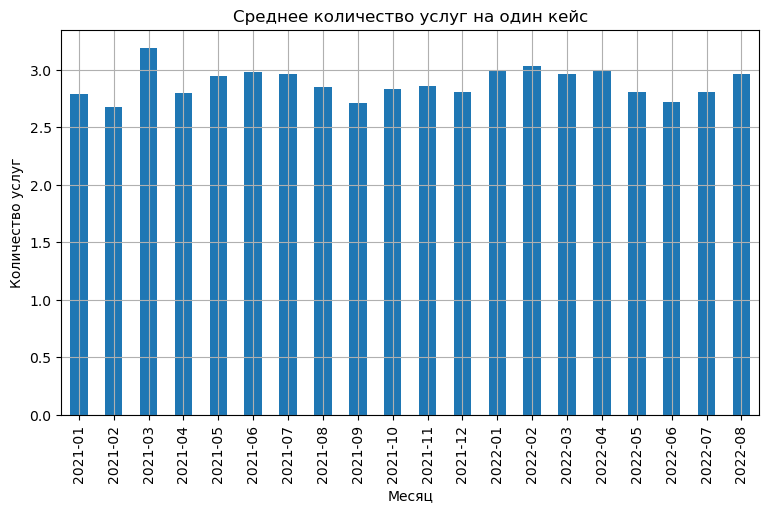

In [45]:
# создадим график по среднему количеству услуг на один кейс в 2021 и 2022 годах
service_quantity.plot(kind='bar', grid=True, figsize=(9, 5), y='mean', 
                               title='Среднее количество услуг на один кейс',
                               legend = False)

plt.xlabel('Месяц')
plt.ylabel('Количество услуг')
plt.show()

Среднее количество услуг варьируется от 2.5 до 3.2. Сильного разброса в количестве оказанных услуг на один кейс нет.

Проверим изменилась ли средняя стоимость обслуживания пациентов из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот).

Сделаем категоризацию услуг на недорогие, средние по стоимости и дорогие.

In [46]:
# напишем функцию для категоризации
def categorize_price(price_one_service):
    try:
        if price_one_service <= 1000:
            return 'Недорогая'
        elif 1001 <= price_one_service <= 3000:
            return 'Средняя'
        elif price_one_service >= 3001:
            return 'Дорогая'
        
    except:
        pass

In [47]:
# добавим столбец в исходный датафрейм с указанием категории услуг
data['price_category'] = data['price_one_service'].apply(categorize_price)
data

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_date_year,service_date_month,month_year,price_one_service,price_category
0,30268157003,2021-01-24,прием первичный,1470,1,490777,2.0,26,2021,1,2021-01,1470.0,Средняя
1,30268157103,2021-01-24,"взятие материала на посев,цитологическое иссле...",284,1,490777,2.0,26,2021,1,2021-01,284.0,Недорогая
2,30268157203,2021-01-24,"посев отдел,дыхательных путей-слизистая зева с...",1134,1,490777,2.0,26,2021,1,2021-01,1134.0,Средняя
3,30268157303,2021-01-24,"общий анализ крови (лейкоцитарная форм,соэ)",693,1,490777,2.0,26,2021,1,2021-01,693.0,Недорогая
4,30268157403,2021-01-24,ревматоидный фактор,420,1,490777,2.0,26,2021,1,2021-01,420.0,Недорогая
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,общий анализ мочи,495,1,935341,2.0,30,2022,8,2022-08,495.0,Недорогая
85365,33178146903,2022-08-20,"общий анализ крови (лейкоцитарная форм,соэ)",800,1,935341,2.0,30,2022,8,2022-08,800.0,Недорогая
85366,33178147003,2022-08-20,ачтв (активированное частичное тромбопластинов...,300,1,935341,2.0,30,2022,8,2022-08,300.0,Недорогая
85367,33178147103,2022-08-20,протромбин (мно),410,1,935341,2.0,30,2022,8,2022-08,410.0,Недорогая


In [48]:
# создаем сводную таблицу с количеством оказанных услуг в каждой категории помесячно
category_service = pd.pivot_table(data, values='record_id',
                                  index='month_year',
                                  columns='price_category',
                                  aggfunc='count',
                                  fill_value=0,
                                  margins=True)
category_service.drop('All', axis= 0 , inplace= True)
category_service=category_service.reset_index()

category_service.columns = ['month_year', 'Дорогая', 'Недорогая', 'Средняя', 'All']

# переведем количество оказанных услуг в процентное соотношение
category_service['Дорогая'] = round(category_service['Дорогая'] * 100 / category_service['All'])
category_service['Недорогая'] = round(category_service['Недорогая'] * 100 / category_service['All'])
category_service['Средняя'] = round(category_service['Средняя'] * 100 / category_service['All'])
category_service.drop('All', axis= 1 , inplace= True)
category_service

,month_year,Дорогая,Недорогая,Средняя
0,2021-01,2.0,43.0,55.0
1,2021-02,3.0,44.0,53.0
2,2021-03,2.0,49.0,49.0
3,2021-04,3.0,43.0,54.0
4,2021-05,3.0,44.0,53.0
5,2021-06,4.0,45.0,52.0
6,2021-07,3.0,47.0,50.0
7,2021-08,3.0,46.0,51.0
8,2021-09,3.0,43.0,54.0
9,2021-10,4.0,42.0,54.0


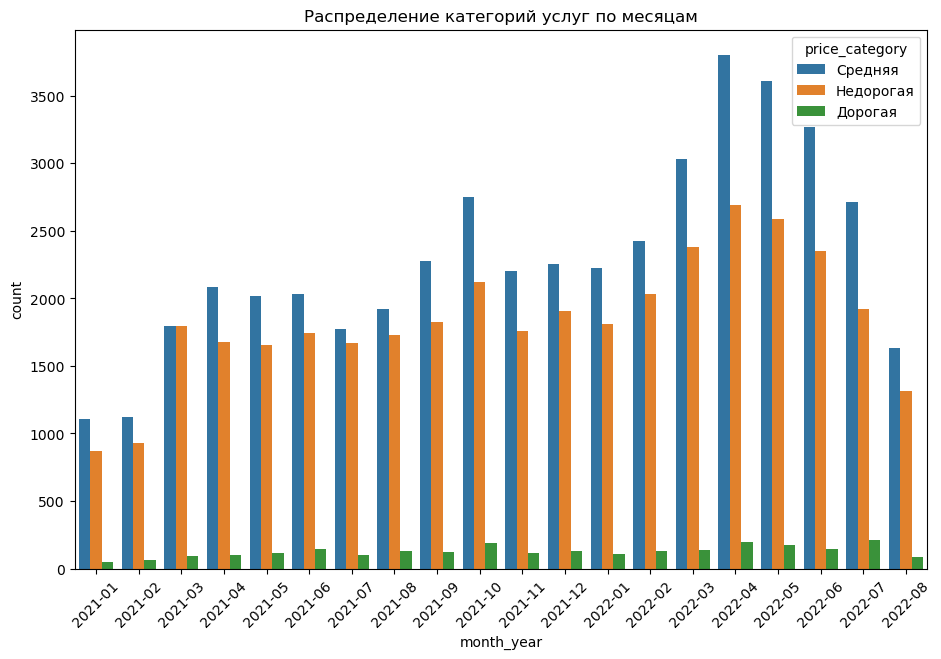

In [49]:
# построим график распределения оказанных услуг по категориям по месяцам
plt.figure(figsize=(11, 7))
sns.countplot(x='month_year', hue='price_category', data=data)
plt.xticks(rotation=45)
plt.title('Распределение категорий услуг по месяцам')
plt.show()

Количество дорогих услуг варьируется от 2 до 4 % за весь период наблюдения. При этом в период с марта по июль 2022 года количество недорогих услуг сократилось и увеличилось количество услуг средней стоимости и составил от 55 до 57 % от общего количества услуг за 1 месяц. В то время как ранее этот показатель составлял 49-55 %.

### Вывод.

Целью данного исследования является необходимость установить параметры, влияющие на изменение средней стоимости обслуживания клиентов в медицинской клинике. 

В ходе исследования было выявлено, что средняя стоимость обслуживания выше в 2022 году, относительно 2021 года. Для установления причин повышения стоимости обслуживания были проверены следующие гипотезы:
- средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги,
- средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс,
- средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот).

Были выделены наиболее часто оказываемые услуги, и выявлено, что цены на эти услуги выросли в октябре 2021 года, а затем в июле 2022 года. При этом общее повышение стоимости составляет от 5 до 159%.

Изменение средней стоимости обслуживания не зависело от среднего количества оказанных услуг на один кейс. Данный параметр составляет размер от 2.5 до 3.2 за весь период. 

Далее в ходе исследования в зависимости от стоимости услугам были присвоены категории "недорогие", "средние" и "дорогие". В 2022 году увеличилось количество услуг со средней стоимостью и составило от 55 до 57 % от общего количества за 1 месяц. В 2021 году данный показатель составлял 49-55%. 

### Ссылка на презентацию:

https://disk.yandex.ru/i/NH8eaBkAKQ372w